In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#reading selected dataset
df = pd.read_csv('cash_flow.csv')
df.head()


,Date,ticker,net cash flow-net cash flow,net cash flow growth,operating cash flow-net operating cash flow,operating cash flow-cash flow ratio,investment cash flow-net investment cash flow,investment cash flow-cash flow ratio,Cash flow from financing-net cash flow,Cash flow from financing-cash flow ratio
0,2022-05-14,sh688235,-3.306560e+08,-113.123749,-1.961086e+09,-593.089495,1.790489e+09,541.495996,-1.562930e+08,-47.267553
1,2022-05-13,sh688981,-1.586874e+10,-216.121342,1.041379e+10,65.624576,-2.709363e+10,-170.735916,8.871870e+08,5.590786
2,2022-05-12,sh603185,9.600612e+08,273.821613,6.525602e+08,67.970690,-2.122044e+09,-221.032163,2.429548e+09,253.061810
3,2022-05-12,sh600679,-2.090316e+08,-576.783603,-1.741870e+07,-8.333046,-1.396160e+08,-66.791806,-5.204274e+07,-24.897063
4,2022-05-10,sz002765,2.101741e+08,920.427028,1.580511e+08,75.200114,-4.193575e+07,-19.952865,9.447854e+07,44.952521


In [3]:
df.dtypes

Date                                              object
ticker                                            object
net cash flow-net cash flow                      float64
net cash flow growth                             float64
operating cash flow-net operating cash flow      float64
operating cash flow-cash flow ratio              float64
investment cash flow-net investment cash flow    float64
investment cash flow-cash flow ratio             float64
Cash flow from financing-net cash flow           float64
Cash flow from financing-cash flow ratio         float64
dtype: object

In [4]:
#print number of rows and columns in given dataset
print(f"Rows in dataset are : {df.shape[0]} \nColumns in dataset are : {df.shape[1]}")

Rows in dataset are : 203331 
Columns in dataset are : 10


In [5]:
#analyzing stats of given dataset like (count , mean, max) etc.
df.describe()

,net cash flow-net cash flow,net cash flow growth,operating cash flow-net operating cash flow,operating cash flow-cash flow ratio,investment cash flow-net investment cash flow,investment cash flow-cash flow ratio,Cash flow from financing-net cash flow,Cash flow from financing-cash flow ratio
count,2.033010e+05,1.890770e+05,2.033310e+05,2.032900e+05,2.026890e+05,2.026640e+05,1.972920e+05,1.972690e+05
mean,2.566382e+08,3.047534e+06,9.349852e+08,8.835623e+02,-1.033870e+09,-8.487563e+02,3.663031e+08,-4.412827e+01
std,1.201596e+10,9.453695e+08,1.983404e+10,9.468586e+04,1.514612e+10,6.932820e+04,6.006373e+09,5.503597e+04
min,-4.687020e+11,-2.362751e+09,-5.880090e+11,-1.276040e+06,-1.311443e+12,-2.941160e+07,-3.678530e+11,-2.005561e+07
25%,-9.574942e+07,-1.329117e+02,-3.117404e+07,-4.228712e+01,-2.300117e+08,-2.066660e+02,-5.589510e+07,-7.211182e+01
50%,-4.390895e+06,1.321312e+01,2.923241e+07,4.249156e+01,-5.380121e+07,-6.750734e+01,0.000000e+00,0.000000e+00
75%,8.655148e+07,1.524849e+02,1.634533e+08,1.955705e+02,-5.861112e+06,-8.654635e+00,1.447794e+08,1.252126e+02
max,1.591251e+12,3.140540e+11,2.020442e+12,3.237037e+07,6.023370e+11,6.642555e+05,3.810390e+11,2.643549e+06


In [6]:
#dropping duplicate values
df=df.drop_duplicates()
print(df)
# df.head(100)

              Date    ticker  net cash flow-net cash flow  \
0       2022-05-14  sh688235                -3.306560e+08   
1       2022-05-13  sh688981                -1.586874e+10   
2       2022-05-12  sh603185                 9.600612e+08   
3       2022-05-12  sh600679                -2.090316e+08   
4       2022-05-10  sz002765                 2.101741e+08   
...            ...       ...                          ...   
203326  2006-03-11  sz000635                -6.062135e+07   
203327  2006-03-11  sz000612                -2.646609e+07   
203328  2006-03-11  sz002040                 1.435208e+07   
203329  2006-03-11  sz000601                 1.300960e+07   
203330  2006-03-11  sz000402                -1.212743e+06   

        net cash flow growth  operating cash flow-net operating cash flow  \
0                -113.123749                                -1.961086e+09   
1                -216.121342                                 1.041379e+10   
2                 273.821613        

In [7]:
#printing number of missing values
df.isna().sum()


Date                                                 0
ticker                                               0
net cash flow-net cash flow                         30
net cash flow growth                             14254
operating cash flow-net operating cash flow          0
operating cash flow-cash flow ratio                 41
investment cash flow-net investment cash flow      642
investment cash flow-cash flow ratio               667
Cash flow from financing-net cash flow            6039
Cash flow from financing-cash flow ratio          6062
dtype: int64

In [8]:
#replacing the missing values in respective columns through mode values
df['net cash flow-net cash flow']=df['net cash flow-net cash flow'].fillna(df['net cash flow-net cash flow'].mode()[0])
df['net cash flow growth']=df['net cash flow growth'].fillna(df['net cash flow growth'].mode()[0])
df['operating cash flow-cash flow ratio']=df['operating cash flow-cash flow ratio'].fillna(df['operating cash flow-cash flow ratio'].mode()[0])
df['investment cash flow-net investment cash flow']=df['investment cash flow-net investment cash flow'].fillna(df['investment cash flow-net investment cash flow'].mode()[0])
df['investment cash flow-cash flow ratio']=df['investment cash flow-cash flow ratio'].fillna(df['investment cash flow-cash flow ratio'].mode()[0])
df['Cash flow from financing-net cash flow']=df['Cash flow from financing-net cash flow'].fillna(df['Cash flow from financing-net cash flow'].mode()[0])
df['Cash flow from financing-cash flow ratio']=df['Cash flow from financing-cash flow ratio'].fillna(df['Cash flow from financing-cash flow ratio'].mode()[0])
df.isna().sum()

Date                                             0
ticker                                           0
net cash flow-net cash flow                      0
net cash flow growth                             0
operating cash flow-net operating cash flow      0
operating cash flow-cash flow ratio              0
investment cash flow-net investment cash flow    0
investment cash flow-cash flow ratio             0
Cash flow from financing-net cash flow           0
Cash flow from financing-cash flow ratio         0
dtype: int64

In [9]:
#scaling the dataset for cleaning
array=df[["net cash flow-net cash flow","net cash flow growth","operating cash flow-net operating cash flow","operating cash flow-cash flow ratio","investment cash flow-net investment cash flow","investment cash flow-cash flow ratio","Cash flow from financing-net cash flow","Cash flow from financing-cash flow ratio"]]
scaled_features = StandardScaler().fit_transform(array)
scaled_features_df = pd.DataFrame(scaled_features, index=array.index, columns=list(array))

In [10]:
scaled_features_df.head()

,net cash flow-net cash flow,net cash flow growth,operating cash flow-net operating cash flow,operating cash flow-cash flow ratio,investment cash flow-net investment cash flow,investment cash flow-cash flow ratio,Cash flow from financing-net cash flow,Cash flow from financing-cash flow ratio
0,-0.048877,-0.003109,-0.146016,-0.015595,0.186552,0.020046,-0.086485,-0.000082
1,-1.342095,-0.003109,0.477907,-0.008637,-1.723487,0.009756,0.089873,0.000893
2,0.058548,-0.003108,-0.014239,-0.008612,-0.072174,0.009029,0.350547,0.005458
3,-0.038754,-0.003109,-0.048019,-0.009418,0.058919,0.011258,-0.068866,0.000330
4,-0.003864,-0.003108,-0.039172,-0.008536,0.065378,0.011934,-0.044102,0.001619


<AxesSubplot:>

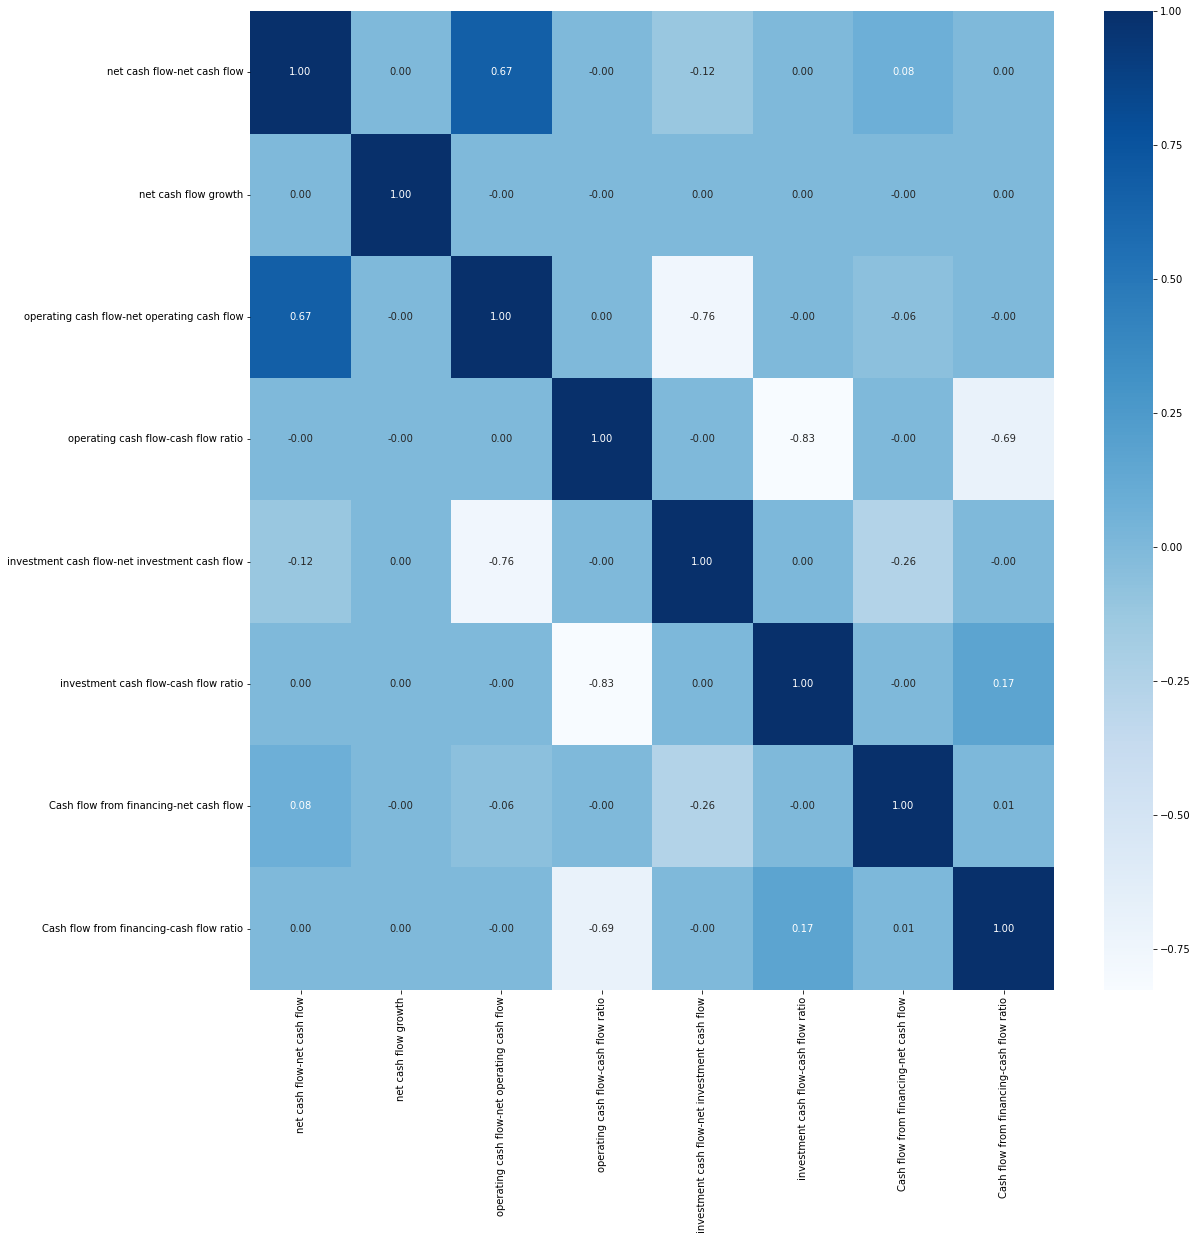

In [11]:
cor1 = scaled_features_df.corr()
plt.figure(figsize =(18,18))
sns.heatmap(cor1,annot=True,fmt=".2f",cmap ="Blues")


In [12]:
df["Date"].value_counts()

2022-04-29    2897
2022-04-28    2815
2022-04-30    2699
2021-10-30    1956
2021-10-29    1911
              ... 
2013-09-12       1
2019-07-11       1
2013-09-07       1
2013-09-04       1
2018-07-11       1
Name: Date, Length: 3750, dtype: int64

<AxesSubplot:ylabel='Frequency'>

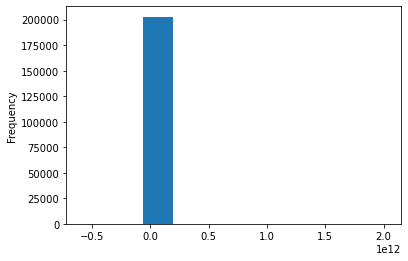

In [13]:
#binning to improve the performance
df['operating cash flow-net operating cash flow'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

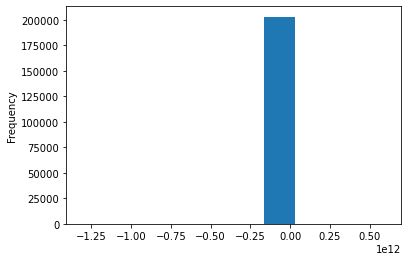

In [14]:
#binning to improve the performance
df['investment cash flow-net investment cash flow'].plot(kind='hist')


<AxesSubplot:ylabel='Frequency'>

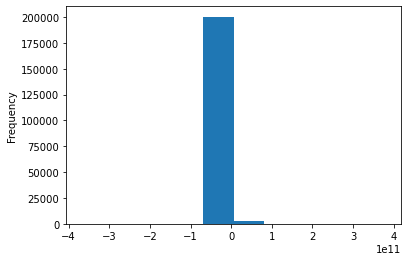

In [15]:
#binning to improve the performance
df['Cash flow from financing-net cash flow'].plot(kind='hist')


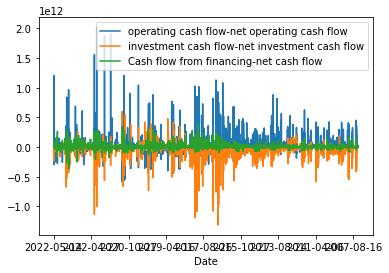

In [16]:
df.plot(x="Date", y=["operating cash flow-net operating cash flow", "investment cash flow-net investment cash flow","Cash flow from financing-net cash flow"])
plt.show()


count    2.033310e+05
mean     9.349852e+08
std      1.983404e+10
min     -5.880090e+11
25%     -3.117404e+07
50%      2.923241e+07
75%      1.634533e+08
max      2.020442e+12
Name: operating cash flow-net operating cash flow, dtype: float64

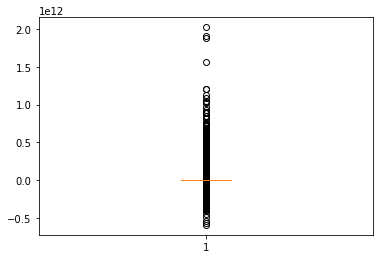

In [17]:
# plt.figure(figsize=(100, 100))
plt.boxplot(df["operating cash flow-net operating cash flow"])
# scaled_features_df["operating cash flow-net operating cash flow"].describe()
# print("hii")
df["operating cash flow-net operating cash flow"].describe()

In [18]:
df["operating cash flow-net operating cash flow"].describe()

count    2.033310e+05
mean     9.349852e+08
std      1.983404e+10
min     -5.880090e+11
25%     -3.117404e+07
50%      2.923241e+07
75%      1.634533e+08
max      2.020442e+12
Name: operating cash flow-net operating cash flow, dtype: float64

<AxesSubplot:xlabel='net cash flow-net cash flow', ylabel='investment cash flow-net investment cash flow'>

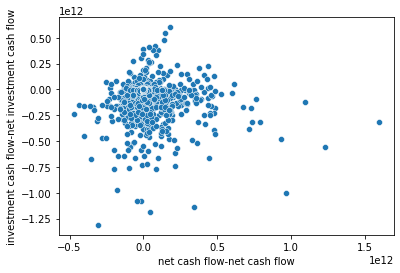

In [21]:
sns.scatterplot(x=df['net cash flow-net cash flow'], y=df['investment cash flow-net investment cash flow'])
#very little outliers

<AxesSubplot:xlabel='net cash flow-net cash flow', ylabel='operating cash flow-net operating cash flow'>

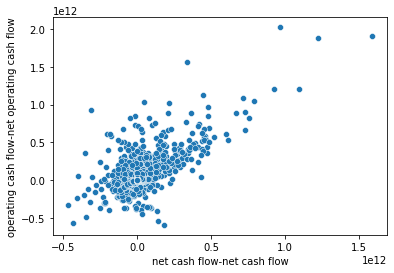

In [23]:
sns.scatterplot(x=df['net cash flow-net cash flow'], y=df['operating cash flow-net operating cash flow'])
#little outliers

<AxesSubplot:xlabel='net cash flow-net cash flow', ylabel='Cash flow from financing-net cash flow'>

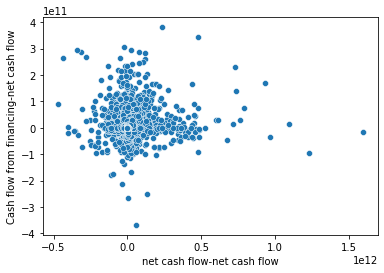

In [24]:
sns.scatterplot(x=df['net cash flow-net cash flow'], y=df['Cash flow from financing-net cash flow'])
#little outliers

<AxesSubplot:xlabel='operating cash flow-net operating cash flow', ylabel='investment cash flow-net investment cash flow'>

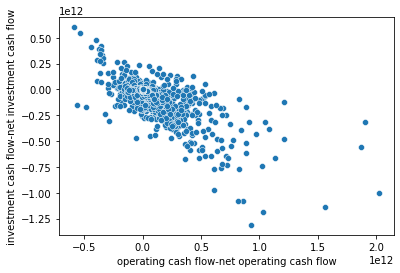

In [22]:
sns.scatterplot(x=df['operating cash flow-net operating cash flow'], y=df['investment cash flow-net investment cash flow'])
# nooutliers

<AxesSubplot:xlabel='operating cash flow-net operating cash flow', ylabel='Cash flow from financing-net cash flow'>

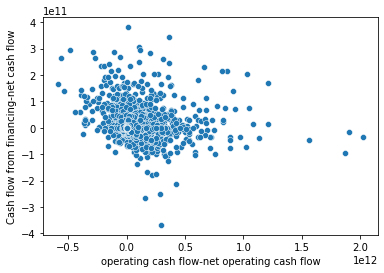

In [26]:
sns.scatterplot(x=df['operating cash flow-net operating cash flow'], y=df['Cash flow from financing-net cash flow'])
#little outliers

<AxesSubplot:xlabel='investment cash flow-net investment cash flow', ylabel='Cash flow from financing-net cash flow'>

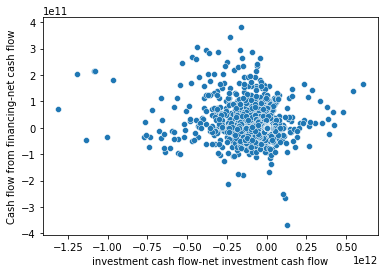

In [27]:
sns.scatterplot(x=df['investment cash flow-net investment cash flow'], y=df['Cash flow from financing-net cash flow'])
#no outliers

In [28]:
df["Class"] = " "

df

,Date,ticker,net cash flow-net cash flow,net cash flow growth,operating cash flow-net operating cash flow,operating cash flow-cash flow ratio,investment cash flow-net investment cash flow,investment cash flow-cash flow ratio,Cash flow from financing-net cash flow,Cash flow from financing-cash flow ratio,Class
0,2022-05-14,sh688235,-3.306560e+08,-113.123749,-1.961086e+09,-593.089495,1.790489e+09,541.495996,-1.562930e+08,-47.267553,
1,2022-05-13,sh688981,-1.586874e+10,-216.121342,1.041379e+10,65.624576,-2.709363e+10,-170.735916,8.871870e+08,5.590786,
2,2022-05-12,sh603185,9.600612e+08,273.821613,6.525602e+08,67.970690,-2.122044e+09,-221.032163,2.429548e+09,253.061810,
3,2022-05-12,sh600679,-2.090316e+08,-576.783603,-1.741870e+07,-8.333046,-1.396160e+08,-66.791806,-5.204274e+07,-24.897063,
4,2022-05-10,sz002765,2.101741e+08,920.427028,1.580511e+08,75.200114,-4.193575e+07,-19.952865,9.447854e+07,44.952521,
...,...,...,...,...,...,...,...,...,...,...,...
203326,2006-03-11,sz000635,-6.062135e+07,-9.116905,2.638024e+08,435.164252,-2.079947e+08,-343.104656,-1.170280e+08,-193.047445,
203327,2006-03-11,sz000612,-2.646609e+07,-147.157358,5.597171e+07,211.484618,-4.609407e+07,-174.162765,-3.634372e+07,-137.321852,
203328,2006-03-11,sz002040,1.435208e+07,105.985804,-1.008243e+07,-70.250641,1.665045e+07,116.014183,7.303997e+06,50.891557,
203329,2006-03-11,sz000601,1.300960e+07,126.643988,-8.102140e+06,-62.278183,8.678513e+07,667.085522,-6.567339e+07,-504.807339,


In [29]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 42)


In [31]:
df_train

,Date,ticker,net cash flow-net cash flow,net cash flow growth,operating cash flow-net operating cash flow,operating cash flow-cash flow ratio,investment cash flow-net investment cash flow,investment cash flow-cash flow ratio,Cash flow from financing-net cash flow,Cash flow from financing-cash flow ratio,Class
39019,2021-04-29,sh600035,-6.447626e+07,33.758514,1.584129e+08,245.691797,-1.010136e+08,-156.667894,-1.219190e+08,-189.091240,
134096,2015-03-31,sh601700,-4.955132e+08,93.413891,5.453156e+09,1100.506752,-7.344263e+09,-1482.152880,1.478781e+09,298.434213,
27523,2022-03-29,sh603199,-1.766345e+07,-117.072989,9.439133e+07,534.387691,-8.770515e+07,-496.534531,-2.434960e+07,-137.852986,
146333,2014-03-05,sz002624,3.874693e+08,869.083631,1.437870e+08,37.109272,-1.557775e+08,-40.203834,3.996715e+08,103.149213,
164697,2012-04-28,sz300318,1.982979e+08,-36.101447,5.745205e+08,289.725962,-5.265697e+08,-265.544769,1.557083e+08,78.522410,
...,...,...,...,...,...,...,...,...,...,...,...
119879,2016-10-31,sh603336,-1.417353e+07,-171.256028,-1.630944e+07,-115.069731,-6.101894e+06,-43.051342,7.596055e+06,53.593254,
103694,2017-04-28,sz000027,-1.361990e+09,-173.677272,4.887948e+08,35.888270,-1.581652e+09,-116.127997,-2.728824e+08,-20.035563,
131932,2016-08-08,sz300540,2.245703e+07,1308.730972,1.548445e+08,689.514815,-1.999925e+08,-890.556619,6.760504e+07,301.041805,
146867,2013-10-30,sh601828,4.436400e+10,-48.795014,1.679540e+11,378.581733,-2.134670e+11,-481.171671,8.922200e+10,201.113515,


In [32]:
print(f"Rows in dataset are : {df_train.shape[0]} \nColumns in dataset are : {df.shape[1]}")

Rows in dataset are : 142331 
Columns in dataset are : 11
